<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [75]:
#Establish connection and create cursor
import mysql.connector
import mysql
import pandas as pd
import matplotlib.pyplot as plt

try:
    cnx = mysql.connector.connect(user='root', password='root', host='127.0.0.1', database='csgo')
    cursor = cnx.cursor()
    print("Succesfully connected to MySQL server, cursor initiated as cursor.")
except (mysql.connector.errors.InterfaceError) as e:
    print("Connection to MySQL server failed, cursor not created.")
    print(e)


Succesfully connected to MySQL server, cursor initiated as cursor.


In [ ]:
#Get data and customize pandas dataframe
query = "select count(map) as amount, map as map from results where map not like 'bo%' group by map order by count(map) desc"
cursor.execute(query)
df = pd.DataFrame(cursor.fetchall(), columns = ['number', 'map'])
mapDict = dict({'cbl': 'Cobblestone', 'd2': 'Dust2', 'trn': 'Train', 'mrg': 'Mirage', '-': 'Unknown', 'ovp': 'Overpass', 'inf': 'Inferno', 'cch': 'Cache', 'nuke': 'Nuke', 'tcn': 'Tuscan'})
df = df.replace(mapDict)
df.set_index('map', drop=True, inplace=True)

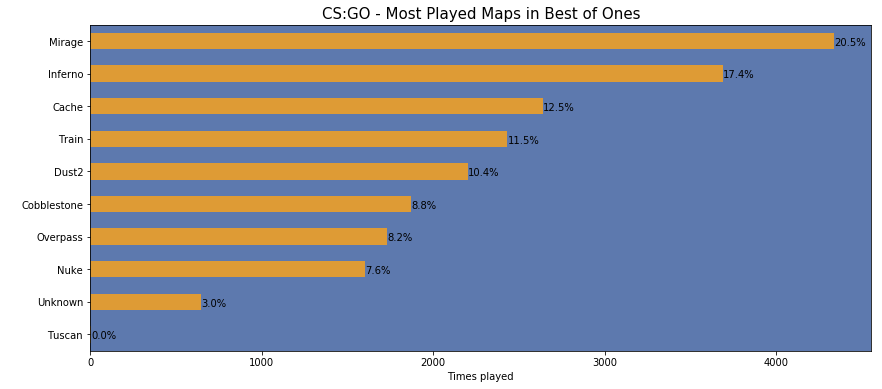

In [84]:
#Create plot from dataframe
ax = df['number'].plot(kind='barh', rot=0, figsize=(14, 6), color='#de9b35')
ax.set_xlabel('Times played')
ax.set_ylabel(' ')
ax.set_title("CS:GO - Most Played Maps in Best of Ones", fontsize=15)
ax.set_xticks([0, 1000, 2000, 3000, 4000])
ax.set_facecolor('#5d79ae')
#ax.set_facecolor('#de9b35')

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, str(round((i.get_width()/total)*100, 1))+'%', fontsize=10, color='black')
# invert for largest on top 
ax.invert_yaxis()
plt.savefig('CSbyMaps.png',dpi=1000)
plt.show()